In [ ]:
# understnding the data-- EDA.. 

In [ ]:
# preprocessing -data cleaning handling missing value
# outliers handling--label encoding (categorical to numeric transformation)

In [ ]:
# scaling -> what kind of correlation between the variables

In [ ]:
# our data is ready to play... -make the prediction 
#evaluation the prediction.( train the machine and check the performance)
#.how accurate the result .. interpretation.
# tunning .. 
#finally model is ready

In [1]:
#import the basic libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
# magic command .. 
import seaborn as sns
import os
os.getcwd()

'C:\\Users\\SavadamuthuSaravanan'

In [3]:
#reading the file
df=pd.read_excel("data_preprocessing.xlsx")

In [4]:
df.head() #shows first 5 rows

,Dept,Age,Experience,Salary,Education,Projects
0,HR,32.0,9,40000.0,Under_Graduate,0.0
1,HR,33.0,12,48000.0,Master,0.0
2,IT,35.0,12,45000.0,Master,5.0
3,IT,NaN,12,46000.0,Graduate,5.0
4,HR,34.0,11,NaN,Graduate,2.0


In [5]:
df.tail(5)  #last 5 rows information

,Dept,Age,Experience,Salary,Education,Projects
28,Sales,70.0,45,90000.0,Master,NaN
29,HR,32.0,12,88000.0,Under_Graduate,1.0
30,IT,19.0,0,20000.0,Graduate,2.0
31,Marketing,75.0,50,39000.0,Master,1.0
32,HR,NaN,11,42000.0,?,2.0


In [6]:
df.describe()

,Age,Salary,Projects
count,30.000000,31.000000,27.000000
mean,37.333333,41983.870968,2.148148
std,18.690461,15998.168578,1.261980
min,0.000000,20000.000000,0.000000
25%,29.500000,35500.000000,1.000000
50%,34.500000,42000.000000,2.000000
75%,48.750000,45250.000000,3.000000
max,75.000000,90000.000000,5.000000


In [7]:
df.describe(percentiles=[0.10,0.20,0.50,0.90]) #shows each category percentile range

,Age,Salary,Projects
count,30.000000,31.000000,27.000000
mean,37.333333,41983.870968,2.148148
std,18.690461,15998.168578,1.261980
min,0.000000,20000.000000,0.000000
10%,17.100000,23000.000000,1.000000
20%,28.800000,32000.000000,1.000000
50%,34.500000,42000.000000,2.000000
90%,57.400000,60000.000000,3.000000
max,75.000000,90000.000000,5.000000


In [7]:
df.describe(include='object')

,Dept,Experience,Education
count,31,29,31
unique,4,15,5
top,HR,12,Master
freq,13,6,12


In [8]:
df.describe(include='float')

,Age,Salary,Projects
count,30.000000,31.000000,27.000000
mean,37.333333,41983.870968,2.148148
std,18.690461,15998.168578,1.261980
min,0.000000,20000.000000,0.000000
25%,29.500000,35500.000000,1.000000
50%,34.500000,42000.000000,2.000000
75%,48.750000,45250.000000,3.000000
max,75.000000,90000.000000,5.000000


In [9]:
# finding the missing value
df.isnull().sum()

Dept          2
Age           3
Experience    4
Salary        2
Education     2
Projects      6
dtype: int64

In [10]:
df.isnull().mean()*100 #to know percentage of missing value

Dept           6.060606
Age            9.090909
Experience    12.121212
Salary         6.060606
Education      6.060606
Projects      18.181818
dtype: float64

In [11]:
df.isnull().sum().sum() #total no. of missing values in the dataset

19

In [12]:
df.isna().any() #isnull and isna both give the same result

Dept          True
Age           True
Experience    True
Salary        True
Education     True
Projects      True
dtype: bool

In [13]:
# lets start handing the misisng value
df1=df.copy()

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        31 non-null     object 
 1   Age         30 non-null     float64
 2   Experience  29 non-null     object 
 3   Salary      31 non-null     float64
 4   Education   31 non-null     object 
 5   Projects    27 non-null     float64
dtypes: float64(3), object(3)
memory usage: 1.7+ KB


In [17]:
#before applying the mean/median approach on the numerical data type
df['Age'].isnull().sum()

3

In [ ]:
# apply the mean/median approach on the numerical data type

In [15]:
df1["Age"]=df1["Age"].fillna(df1["Age"].mean()) #Fills missing values in median approach

In [16]:
df1['Age'].isnull().sum()

0

In [18]:
df1['Age'].head()

0    32.000000
1    33.000000
2    35.000000
3    37.333333
4    34.000000
Name: Age, dtype: float64

In [19]:
df1["Age"]=df1["Age"].fillna(df1["Age"].median()) #Fills missing values in median approach

In [20]:
df1['Age'].head()

0    32.000000
1    33.000000
2    35.000000
3    37.333333
4    34.000000
Name: Age, dtype: float64

In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        31 non-null     object 
 1   Age         33 non-null     float64
 2   Experience  29 non-null     object 
 3   Salary      31 non-null     float64
 4   Education   31 non-null     object 
 5   Projects    27 non-null     float64
dtypes: float64(3), object(3)
memory usage: 1.7+ KB


In [21]:
df1["Salary"]=df1["Salary"].fillna(df1["Salary"].median())

In [26]:
df1["Salary"].value_counts()

42000.0    7
39000.0    4
45000.0    3
22000.0    2
46000.0    2
23000.0    2
60000.0    2
40000.0    1
88000.0    1
90000.0    1
26000.0    1
35000.0    1
32000.0    1
48000.0    1
38000.0    1
45500.0    1
36000.0    1
20000.0    1
Name: Salary, dtype: int64

In [29]:
df1["Projects"]=df1["Projects"].fillna(df1["Projects"].median())

In [ ]:
# lets try to convert the data type ( experience column)

In [30]:
df1["Experience"]=pd.to_numeric(df1["Experience"])

ValueError: Unable to parse string "." at position 24

In [36]:
df1["Experience"]

0       9
1      12
2      12
3      12
4      11
5      13
6      12
7      10
8     NaN
9      14
10    NaN
11     14
12    8.5
13     11
14    NaN
15    NaN
16     14
17     13
18     11
19      2
20     35
21      2
22     12
23      2
24      .
25      2
26      %
27      a
28     45
29     12
30      0
31     50
32     11
Name: Experience, dtype: object

In [37]:
df1["Experience"].isnull().sum()

4

In [38]:
df1["Experience"].mask(df1["Experience"].eq("."),inplace=True)

In [40]:
df1["Experience"].isnull().sum()

5

In [41]:
df1["Experience"].mask(df1["Experience"].eq("%"),inplace=True)

In [42]:
df1["Experience"]

0       9
1      12
2      12
3      12
4      11
5      13
6      12
7      10
8     NaN
9      14
10    NaN
11     14
12    8.5
13     11
14    NaN
15    NaN
16     14
17     13
18     11
19      2
20     35
21      2
22     12
23      2
24    NaN
25      2
26    NaN
27      a
28     45
29     12
30      0
31     50
32     11
Name: Experience, dtype: object

In [44]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        31 non-null     object 
 1   Age         33 non-null     float64
 2   Experience  26 non-null     object 
 3   Salary      33 non-null     float64
 4   Education   31 non-null     object 
 5   Projects    33 non-null     float64
dtypes: float64(3), object(3)
memory usage: 1.7+ KB


In [45]:
df1["Experience"].mask(df1["Experience"].eq("a"),inplace=True)

In [46]:
df1["Experience"]=pd.to_numeric(df1["Experience"])

In [47]:
df1.info() # Experience is converted into float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        31 non-null     object 
 1   Age         33 non-null     float64
 2   Experience  26 non-null     float64
 3   Salary      33 non-null     float64
 4   Education   31 non-null     object 
 5   Projects    33 non-null     float64
dtypes: float64(4), object(2)
memory usage: 1.7+ KB


In [48]:
df1["Dept"].value_counts()

HR           13
IT            8
Sales         6
Marketing     4
Name: Dept, dtype: int64

In [49]:
df1["Experience"]

0      9.0
1     12.0
2     12.0
3     12.0
4     11.0
5     13.0
6     12.0
7     10.0
8      NaN
9     14.0
10     NaN
11    14.0
12     8.5
13    11.0
14     NaN
15     NaN
16    14.0
17    13.0
18    11.0
19     2.0
20    35.0
21     2.0
22    12.0
23     2.0
24     NaN
25     2.0
26     NaN
27     NaN
28    45.0
29    12.0
30     0.0
31    50.0
32    11.0
Name: Experience, dtype: float64

In [50]:
df1["Experience"]=df1["Experience"].fillna(df1["Experience"].median())

In [51]:
df1["Experience"]

0      9.0
1     12.0
2     12.0
3     12.0
4     11.0
5     13.0
6     12.0
7     10.0
8     12.0
9     14.0
10    12.0
11    14.0
12     8.5
13    11.0
14    12.0
15    12.0
16    14.0
17    13.0
18    11.0
19     2.0
20    35.0
21     2.0
22    12.0
23     2.0
24    12.0
25     2.0
26    12.0
27    12.0
28    45.0
29    12.0
30     0.0
31    50.0
32    11.0
Name: Experience, dtype: float64

In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        31 non-null     object 
 1   Age         33 non-null     float64
 2   Experience  33 non-null     float64
 3   Salary      33 non-null     float64
 4   Education   31 non-null     object 
 5   Projects    33 non-null     float64
dtypes: float64(4), object(2)
memory usage: 1.7+ KB


In [53]:
df1["Projects"]

0     0.0
1     0.0
2     5.0
3     5.0
4     2.0
5     1.0
6     2.0
7     2.0
8     2.0
9     3.0
10    3.0
11    3.0
12    3.0
13    2.0
14    2.0
15    3.0
16    3.0
17    3.0
18    2.0
19    2.0
20    3.0
21    1.0
22    2.0
23    1.0
24    1.0
25    1.0
26    3.0
27    2.0
28    2.0
29    1.0
30    2.0
31    1.0
32    2.0
Name: Projects, dtype: float64

In [54]:
df1["Projects"]=df1["Projects"].fillna(df1["Projects"].mean())

In [56]:
print(df1["Projects"])

0     0.0
1     0.0
2     5.0
3     5.0
4     2.0
5     1.0
6     2.0
7     2.0
8     2.0
9     3.0
10    3.0
11    3.0
12    3.0
13    2.0
14    2.0
15    3.0
16    3.0
17    3.0
18    2.0
19    2.0
20    3.0
21    1.0
22    2.0
23    1.0
24    1.0
25    1.0
26    3.0
27    2.0
28    2.0
29    1.0
30    2.0
31    1.0
32    2.0
Name: Projects, dtype: float64


In [57]:
df1["Dept"]=df["Dept"].copy()
df1["Dept"]

0            HR
1            HR
2            IT
3            IT
4            HR
5            IT
6     Marketing
7            HR
8     Marketing
9            IT
10        Sales
11          NaN
12          NaN
13           HR
14        Sales
15           HR
16           IT
17    Marketing
18           HR
19           HR
20           IT
21        Sales
22           HR
23           HR
24           IT
25        Sales
26        Sales
27           HR
28        Sales
29           HR
30           IT
31    Marketing
32           HR
Name: Dept, dtype: object

In [ ]:
#we can handle the missing value in categorical variable with mode approach.

In [58]:
df1.head()

,Dept,Age,Experience,Salary,Education,Projects
0,HR,32.000000,9.0,40000.0,Under_Graduate,0.0
1,HR,33.000000,12.0,48000.0,Master,0.0
2,IT,35.000000,12.0,45000.0,Master,5.0
3,IT,37.333333,12.0,46000.0,Graduate,5.0
4,HR,34.000000,11.0,42000.0,Graduate,2.0


In [59]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        31 non-null     object 
 1   Age         33 non-null     float64
 2   Experience  33 non-null     float64
 3   Salary      33 non-null     float64
 4   Education   31 non-null     object 
 5   Projects    33 non-null     float64
dtypes: float64(4), object(2)
memory usage: 1.7+ KB


In [60]:
df1["Dept"]=df1["Dept"].fillna(df1["Dept"].mode()[0])
df1["Dept"]

0            HR
1            HR
2            IT
3            IT
4            HR
5            IT
6     Marketing
7            HR
8     Marketing
9            IT
10        Sales
11           HR
12           HR
13           HR
14        Sales
15           HR
16           IT
17    Marketing
18           HR
19           HR
20           IT
21        Sales
22           HR
23           HR
24           IT
25        Sales
26        Sales
27           HR
28        Sales
29           HR
30           IT
31    Marketing
32           HR
Name: Dept, dtype: object

In [61]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        33 non-null     object 
 1   Age         33 non-null     float64
 2   Experience  33 non-null     float64
 3   Salary      33 non-null     float64
 4   Education   31 non-null     object 
 5   Projects    33 non-null     float64
dtypes: float64(4), object(2)
memory usage: 1.7+ KB


In [63]:
df1["Education"]=df1["Education"].replace("?",df1["Education"].mode()[000.])

In [64]:
df1["Education"]=df1["Education"].replace("a",df1["Education"].mode()[0])

In [65]:
df1["Education"]=df1["Education"].fillna(df1["Education"].mode()[0])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        33 non-null     object 
 1   Age         33 non-null     float64
 2   Experience  33 non-null     float64
 3   Salary      33 non-null     float64
 4   Education   33 non-null     object 
 5   Projects    33 non-null     float64
dtypes: float64(4), object(2)
memory usage: 1.7+ KB


In [66]:
df1["Education"].value_counts()

Master            16
Under_Graduate     9
Graduate           8
Name: Education, dtype: int64

In [67]:
df2=df.copy()

In [68]:
df2["Education"]=df2["Education"].replace("a","Under_Graduate")

df2["Education"]=df2["Education"].replace("?","Computer_Science")

In [69]:
df2["Education"].value_counts()

Master              12
Under_Graduate      10
Graduate             8
Computer_Science     1
Name: Education, dtype: int64

In [ ]:
# handling multiple categorical columns all together

In [70]:
df3=df.copy()

In [71]:
cat_columns=["Dept","Education"]
cat_columns

['Dept', 'Education']

In [72]:
df3[cat_cols]=df3[cat_columns].fillna(df3[cat_columns].mode()[0])

KeyError: 0

In [73]:
df3[cat_columns]=df3[cat_columns].fillna(df3[cat_columns].iloc[0])
df3[cat_columns]

,Dept,Education
0,HR,Under_Graduate
1,HR,Master
2,IT,Master
3,IT,Graduate
4,HR,Graduate
5,IT,Under_Graduate
6,Marketing,Master
7,HR,Master
8,Marketing,Under_Graduate
9,IT,Master


In [74]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        33 non-null     object 
 1   Age         30 non-null     float64
 2   Experience  29 non-null     object 
 3   Salary      31 non-null     float64
 4   Education   33 non-null     object 
 5   Projects    27 non-null     float64
dtypes: float64(3), object(3)
memory usage: 1.7+ KB


In [75]:
df3.describe()

,Age,Salary,Projects
count,30.000000,31.000000,27.000000
mean,37.333333,41983.870968,2.148148
std,18.690461,15998.168578,1.261980
min,0.000000,20000.000000,0.000000
25%,29.500000,35500.000000,1.000000
50%,34.500000,42000.000000,2.000000
75%,48.750000,45250.000000,3.000000
max,75.000000,90000.000000,5.000000


In [76]:
num_cols=["Age","Salary","Projects"]

In [79]:
df3[num_cols]=df3[num_cols].fillna(df3[num_cols].mean())
df3[num_cols]

,Age,Salary,Projects
0,32.000000,40000.000000,0.000000
1,33.000000,48000.000000,0.000000
2,35.000000,45000.000000,5.000000
3,37.333333,46000.000000,5.000000
4,34.000000,41983.870968,2.000000
5,33.000000,42000.000000,1.000000
6,56.000000,39000.000000,2.148148
7,37.333333,42000.000000,2.148148
8,31.000000,36000.000000,2.000000
9,45.000000,41983.870968,3.000000


In [81]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        33 non-null     object 
 1   Age         33 non-null     float64
 2   Experience  29 non-null     object 
 3   Salary      33 non-null     float64
 4   Education   33 non-null     object 
 5   Projects    33 non-null     float64
dtypes: float64(3), object(3)
memory usage: 1.7+ KB


In [82]:
df10=df.copy()
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        31 non-null     object 
 1   Age         30 non-null     float64
 2   Experience  29 non-null     object 
 3   Salary      31 non-null     float64
 4   Education   31 non-null     object 
 5   Projects    27 non-null     float64
dtypes: float64(3), object(3)
memory usage: 1.7+ KB


In [85]:
df10=df.drop(["Projects"],axis=1) #drop the missing value column wise
df10

,Dept,Age,Experience,Salary,Education
0,HR,32.0,9,40000.0,Under_Graduate
1,HR,33.0,12,48000.0,Master
2,IT,35.0,12,45000.0,Master
3,IT,NaN,12,46000.0,Graduate
4,HR,34.0,11,NaN,Graduate
5,IT,33.0,13,42000.0,NaN
6,Marketing,56.0,12,39000.0,Master
7,HR,NaN,10,42000.0,Master
8,Marketing,31.0,NaN,36000.0,Under_Graduate
9,IT,45.0,14,NaN,Master


In [86]:
df3.dropna(inplace=True) # we want to drop the missing value --- effetive row wise
df3

,Dept,Age,Experience,Salary,Education,Projects
0,HR,32.000000,9,40000.000000,Under_Graduate,0.000000
1,HR,33.000000,12,48000.000000,Master,0.000000
2,IT,35.000000,12,45000.000000,Master,5.000000
3,IT,37.333333,12,46000.000000,Graduate,5.000000
4,HR,34.000000,11,41983.870968,Graduate,2.000000
5,IT,33.000000,13,42000.000000,Under_Graduate,1.000000
6,Marketing,56.000000,12,39000.000000,Master,2.148148
7,HR,37.333333,10,42000.000000,Master,2.148148
9,IT,45.000000,14,41983.870968,Master,3.000000
11,HR,75.000000,14,45500.000000,Graduate,3.000000


In [113]:
df3.dropna(inplace=True)
df3

,Dept,Age,Experience,Salary,Education,Projects
0,HR,32.0,9,40000.0,Under_Graduate,0.0
1,HR,33.0,12,48000.0,Master,0.0
2,IT,35.0,12,45000.0,Master,5.0
16,IT,42.0,14,42000.0,Graduate,3.0
17,Marketing,50.0,13,39000.0,Master,3.0
18,HR,38.0,11,42000.0,Graduate,2.0
19,HR,0.0,2,22000.0,Under_Graduate,2.0
20,IT,52.0,35,60000.0,Master,3.0
21,Sales,27.0,2,23000.0,Under_Graduate,1.0
22,HR,42.0,12,45000.0,Graduate,2.0


In [87]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 32
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        29 non-null     object 
 1   Age         29 non-null     float64
 2   Experience  29 non-null     object 
 3   Salary      29 non-null     float64
 4   Education   29 non-null     object 
 5   Projects    29 non-null     float64
dtypes: float64(3), object(3)
memory usage: 1.6+ KB


In [ ]:
#this is not a good approach when we have less no of observation

In [ ]:
# when the column has more than 50% missing value .. drop the column 
#because imputation approach will have a good amount of biasness,

In [ ]:
# if we have less no. of missiing value to say 20% we can apply imputation.
# if we have some 2-3% missing value we can drop the missing value-- row wise drop approach

# Outlier Treatment - Feature Engg

In [88]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        33 non-null     object 
 1   Age         33 non-null     float64
 2   Experience  33 non-null     float64
 3   Salary      33 non-null     float64
 4   Education   33 non-null     object 
 5   Projects    33 non-null     float64
dtypes: float64(4), object(2)
memory usage: 1.7+ KB


<AxesSubplot:>

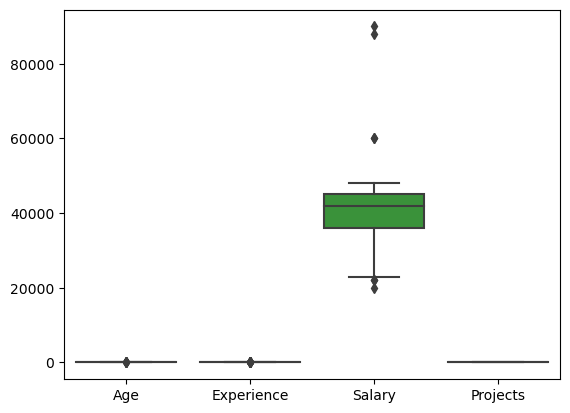

In [90]:
sns.boxplot(data=df1)

<AxesSubplot:ylabel='Salary'>

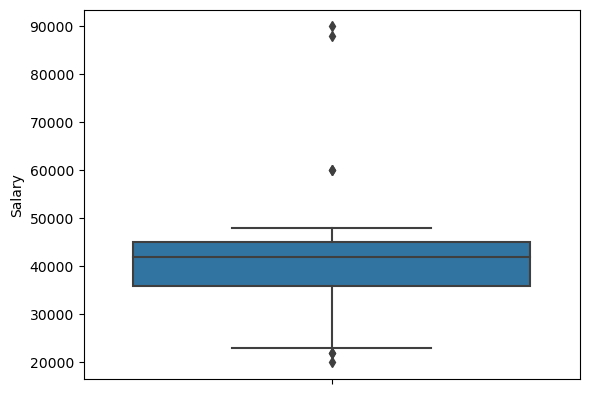

In [91]:
sns.boxplot(y=df1["Salary"])

In [102]:
df1["Salary"].describe()

count       33.000000
mean     41984.848485
std      15490.160611
min      20000.000000
25%      36000.000000
50%      42000.000000
75%      45000.000000
max      90000.000000
Name: Salary, dtype: float64

In [92]:
df4=df1.copy()

In [97]:
Q1=df4.quantile(0.25)
Q3=df4.quantile(0.75)
IQR=Q3-Q1
Upper_fence=(Q3+1.5*IQR)
Lower_fence=(Q1-1.5*IQR)
print("Upper fence values \n",Upper_fence)
print("*******"*5)
print("Lower fence values \n",Lower_fence)
print("*******"*5)

Upper fence values 
 Age              66.0
Experience       13.5
Salary        58500.0
Projects          6.0
dtype: float64
***********************************
Lower fence values 
 Age              10.0
Experience        9.5
Salary        22500.0
Projects         -2.0
dtype: float64
***********************************


In [99]:
# Handling outlier Using IQR approach
Q1=df4.quantile(0.25)
Q3=df4.quantile(0.75)
IQR=Q3-Q1
Upper_fence=(Q3+1.5*IQR)
Lower_fence=(Q1-1.5*IQR)
print("Upper_fence \n------------------------------")
print(Upper_fence)
print("Lower_fence \n------------------------------")
print(Lower_fence)

Upper_fence 
------------------------------
Age              66.0
Experience       13.5
Salary        58500.0
Projects          6.0
dtype: float64
Lower_fence 
------------------------------
Age              10.0
Experience        9.5
Salary        22500.0
Projects         -2.0
dtype: float64


In [100]:
# removal of outlier approach--- trimming approach
df4=df4[~((df4<(Lower_fence))|(df4>(Upper_fence))).any(axis=1)]
# (|)pipe function means either one.
#(~)tilda function means compare and apply drop approach
# when apply axis=1 , it move column wise find the outlier

In [101]:
df4.describe()

,Age,Experience,Salary,Projects
count,17.000000,17.000000,17.000000,17.000000
mean,38.529412,11.764706,41117.647059,2.352941
std,7.422805,0.752447,5301.914194,1.221739
min,29.000000,10.000000,26000.000000,0.000000
25%,33.000000,11.000000,39000.000000,2.000000
50%,37.333333,12.000000,42000.000000,2.000000
75%,42.000000,12.000000,45000.000000,3.000000
max,56.000000,13.000000,48000.000000,5.000000


<AxesSubplot:ylabel='Salary'>

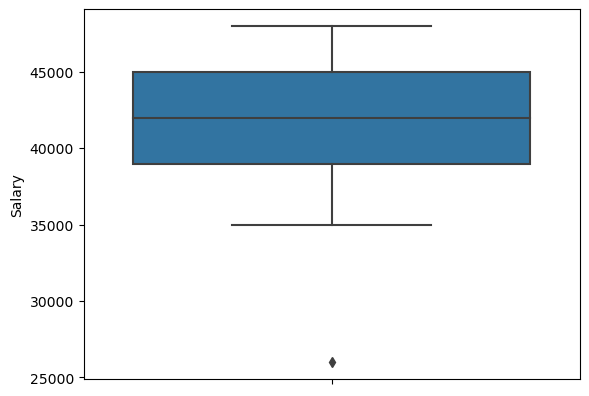

In [103]:
sns.boxplot(y=df4["Salary"])

# capping approach - adjustment of outlier -- No delete

In [104]:
df5=df1.copy()
# Handling outlier Using IQR approach
Q1=df5.quantile(0.25)
Q3=df5.quantile(0.75)
IQR=Q3-Q1
Upper_fence=(Q3+1.5*IQR)
Lower_fence=Q1-1.5*IQR
print("Upper_fence \n----------------------")
print(Upper_fence)

print("Lower_fence \n-----------------------")
print(Lower_fence)

Upper_fence 
----------------------
Age              66.0
Experience       13.5
Salary        58500.0
Projects          6.0
dtype: float64
Lower_fence 
-----------------------
Age              10.0
Experience        9.5
Salary        22500.0
Projects         -2.0
dtype: float64


In [115]:
df5["Age"]=np.where(df5["Age"]>64.5,64.5,np.where(df5["Age"]<12.5,12.5,df5["Age"]))
df5.describe()

,Age,Experience,Salary,Projects
count,33.000000,33.000000,33.000000,33.000000
mean,37.666667,13.136364,41984.848485,2.148148
std,13.812547,10.616374,15490.160611,1.137533
min,12.500000,0.000000,20000.000000,0.000000
25%,31.000000,11.000000,36000.000000,1.000000
50%,37.333333,12.000000,42000.000000,2.148148
75%,45.000000,12.000000,45000.000000,3.000000
max,64.500000,50.000000,90000.000000,5.000000


In [116]:
df5["Salary"]=np.where(df5["Salary"]>58500,58500,np.where(df5["Salary"]<22500,22500,df5["Salary"]))

In [117]:
# apply the capping approach on all the numerical columns
num_cols=["Age","Experience","Salary","Projects"]

In [118]:
df6=df1.copy()

In [119]:
df6[num_cols]=np.where(df6[num_cols]>Upper_fence,Upper_fence,np.where(df6[num_cols]<Lower_fence,Lower_fence,df6[num_cols]))

In [120]:
df6.describe()

,Age,Experience,Salary,Projects
count,33.000000,33.000000,33.000000,33.000000
mean,37.575758,11.621212,40151.515152,2.148148
std,14.523036,1.397712,10373.105888,1.137533
min,10.000000,9.500000,22500.000000,0.000000
25%,31.000000,11.000000,36000.000000,1.000000
50%,37.333333,12.000000,42000.000000,2.148148
75%,45.000000,12.000000,45000.000000,3.000000
max,66.000000,13.500000,58500.000000,5.000000


In [106]:
# Using Z-score method for outlier treatment

#upper_fence=mean+3sd
#lower_fence=mean-3sd
df7=df1.copy()

In [108]:
# Handling outlier Using Z approach

Upper_fence=df7.mean()+3*df7.std()
Lower_fence=df7.mean()-3*df7.std()
print("Upper_fence \n-----------------\n",Upper_fence)
print("Lower_fence \n-----------------\n", Lower_fence)

Upper_fence 
-----------------
 Age              90.711700
Experience       44.985484
Salary        88455.330318
Projects          5.538248
dtype: float64
Lower_fence 
-----------------
 Age            -16.045033
Experience     -18.712757
Salary       -4485.633348
Projects        -1.295824
dtype: float64


In [ ]:
# we can apply the same approach as we discussed in IQR (same function we can use)


In [ ]:
# most useful approach is IQR -- capping approach

In [ ]:
# Label encoding-- Transformation of data categorical to numeric format

In [114]:
df10=df1.copy()
df10.head()

,Dept,Age,Experience,Salary,Education,Projects
0,HR,32.000000,9.0,40000.0,Under_Graduate,0.0
1,HR,33.000000,12.0,48000.0,Master,0.0
2,IT,35.000000,12.0,45000.0,Master,5.0
3,IT,37.333333,12.0,46000.0,Graduate,5.0
4,HR,34.000000,11.0,42000.0,Graduate,2.0


In [127]:
# astype function approach

In [116]:
df10["Dept"]=df10["Dept"].astype("category").cat.codes
df10["Dept"].head()

0    0
1    0
2    1
3    1
4    0
Name: Dept, dtype: int8

In [117]:
df10["Education"].head(1)

0    Under_Graduate
Name: Education, dtype: object

In [120]:
df10["Education"]=df10["Education"].astype("category").cat.codes

In [121]:
df10.head(5)

,Dept,Age,Experience,Salary,Education,Projects
0,0,32.000000,9.0,40000.0,2,0.0
1,0,33.000000,12.0,48000.0,1,0.0
2,1,35.000000,12.0,45000.0,1,5.0
3,1,37.333333,12.0,46000.0,0,5.0
4,0,34.000000,11.0,42000.0,0,2.0


In [ ]:
# second approach --- sklearn label encoder

In [122]:
from sklearn import preprocessing

In [123]:
label_encoding=preprocessing.LabelEncoder()
label_encoding

LabelEncoder()

In [125]:
df12=df.copy()
df12.head(5)

,Dept,Age,Experience,Salary,Education,Projects
0,HR,32.0,9,40000.0,Under_Graduate,0.0
1,HR,33.0,12,48000.0,Master,0.0
2,IT,35.0,12,45000.0,Master,5.0
3,IT,NaN,12,46000.0,Graduate,5.0
4,HR,34.0,11,NaN,Graduate,2.0


In [127]:
df12['Dept']=label_encoding.fit_transform(df12['Dept'])
df12.head()

,Dept,Age,Experience,Salary,Education,Projects
0,0,32.0,9,40000.0,Under_Graduate,0.0
1,0,33.0,12,48000.0,Master,0.0
2,1,35.0,12,45000.0,Master,5.0
3,1,NaN,12,46000.0,Graduate,5.0
4,0,34.0,11,NaN,Graduate,2.0


In [129]:
df12["Education"]=label_encoding.fit_transform(df['Education'])
df12.head()

,Dept,Age,Experience,Salary,Education,Projects
0,0,32.0,9,40000.0,3,0.0
1,0,33.0,12,48000.0,2,0.0
2,1,35.0,12,45000.0,2,5.0
3,1,NaN,12,46000.0,1,5.0
4,0,34.0,11,NaN,1,2.0


In [ ]:
# label encoding advantage-- straightforward easy to understand
# limitation- misinterpretation of number, becoause it uses the dictionary approach
# our model will give high important to high no.( if a large no. of categories are there)

In [ ]:
#If you have many unique categories or high cardinality features, this can lead to a large number of new columns.
#High dimensionality can impact model training time, memory usage, and model performance.

In [130]:
df12=df6.copy()

In [140]:
#df12=pd.get_dummies(df12,columns=["Dept","Education"])
df12.head()

,Age,Experience,Salary,Projects,Dept_HR,Dept_IT,Dept_Marketing,Dept_Sales,Education_Graduate,Education_Master,Education_Under_Graduate
0,32.000000,9.0,40000.0,0.0,1,0,0,0,0,0,1
1,33.000000,12.0,48000.0,0.0,1,0,0,0,0,1,0
2,35.000000,12.0,45000.0,5.0,0,1,0,0,0,1,0
3,37.333333,12.0,46000.0,5.0,0,1,0,0,1,0,0
4,34.000000,11.0,42000.0,2.0,1,0,0,0,1,0,0


In [ ]:
# categorical variables--- are ordinal ... how to apply the string to numeric approach

In [147]:
df15=df6.copy()
df15.head()

,Dept,Age,Experience,Salary,Education,Projects
0,HR,32.000000,9.0,40000.0,Under_Graduate,0.0
1,HR,33.000000,12.0,48000.0,Master,0.0
2,IT,35.000000,12.0,45000.0,Master,5.0
3,IT,37.333333,12.0,46000.0,Graduate,5.0
4,HR,34.000000,11.0,42000.0,Graduate,2.0


In [ ]:
# if we apply the label encoding -- it follow dictionary approach 
# under graduate -- will assign 3
# but as per domain knowledge --- its ordinal also undergraduate should assign low marks than master

In [144]:
# mapping approach 

In [148]:
df15["Education"]=df15["Education"].map({"Under_Graduate":0,"Graduate":1,"Master":2})

In [149]:
df15.head(10)

,Dept,Age,Experience,Salary,Education,Projects
0,HR,32.000000,9.0,40000.0,0,0.0
1,HR,33.000000,12.0,48000.0,2,0.0
2,IT,35.000000,12.0,45000.0,2,5.0
3,IT,37.333333,12.0,46000.0,1,5.0
4,HR,34.000000,11.0,42000.0,1,2.0
5,IT,33.000000,13.0,42000.0,2,1.0
6,Marketing,56.000000,12.0,39000.0,2,2.0
7,HR,37.333333,10.0,42000.0,2,2.0
8,Marketing,31.000000,12.0,36000.0,0,2.0
9,IT,45.000000,14.0,42000.0,2,3.0
